<a href="https://colab.research.google.com/github/deondmello16/PyTorch-Journey/blob/main/PyTorch%2C_TorchVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `PyTorch and TorchVision`

## Concepts that will be covered in the notebook

| <div style = "width: 10px">Topic </div>	| Contents |
|---------|-----------|
| 0. Computer vision libraries in PyTorch |	PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.|
| 1. Load data	| To practice computer vision, we'll start with some images of different pieces of clothing from FashionMNIST. |
| 2. Prepare data |	We've got some images, let's load them in with a PyTorch DataLoader so we can use them with our training loop. |
| 3. Model 0: | Building a baseline model	Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.|
| 4. Making predictions and evaluting model 0 |	Let's make some predictions with our baseline model and evaluate them. |
| 5. Setup device agnostic code for future models	| It's best practice to write device-agnostic code, so let's set it up.|
| 6. Model 1: | Adding non-linearity	Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers.|
| 7. Model 2: Convolutional Neural Network (CNN)	| Time to get computer vision specific and introduce the powerful convolutional neural network architecture.|
| 8. Comparing our models	|We've built three different models, let's compare them.|
| 9. Evaluating our best model |	Let's make some predictons on random images and evaluate our best model. |
|10. Making a confusion matrix	| A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| 11. Saving and loading the best performing model |	Since we might want to use our model for later, let's save it and make sure it loads back in correctly.|

####  Various Computer vision Libraries Offered by Torch


| PyTorch module	| <div style="text-align: right; width: 25em"> What does it do? </div> |
|------------------|-----------------|
| `torchvision` |	Contains datasets, model architectures and image transformations often used for computer vision problems.|
| `torchvision.datasets`  |	Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.|
| `torchvision.models` |	This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.|
| `torchvision.transforms` |	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.|
| `torch.utils.data.Dataset` |	Base dataset class for PyTorch.|
| `torch.utils.data.DataLoader`|	Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).|

## Getting started

In [1]:
import torch
from torch import nn


import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


### Getting the datasets

In [2]:
train_data = datasets.FashionMNIST(
    root="./data",
    train = True,
    transform = ToTensor(),
    download = True,
    target_transform= None,
)


test_data = datasets.FashionMNIST(
    root="./data",
    train = False,
    transform = ToTensor(),
    download = True,
    # target_transform= None,
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16110182.40it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 277545.84it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4947194.35it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12144137.79it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



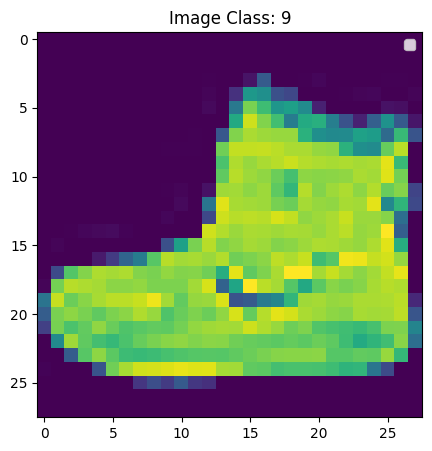

In [3]:
## View the name in raw form
image, label = train_data[0]
plt.figure(figsize = (5,5))
plt.imshow(image[0])
plt.title("Image Class: "+str(label))
plt.legend()

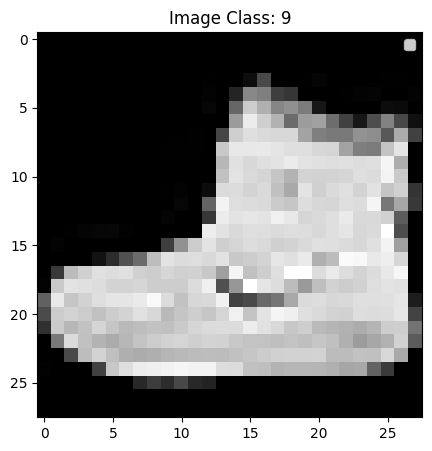

In [4]:
## View the name in grey scale
image, label = train_data[0]
plt.figure(figsize = (5,5))
plt.imshow(image[0], cmap = 'gray')
plt.title("Image Class: "+str(label))
plt.legend()

In [5]:
# Lets see what the size of train_data and test_data

print(f"Size of train_data {len(train_data)}")
print(f"Size of test_data {len(test_data)}")

Size of train_data 60000
Size of test_data 10000


In [6]:
## View the classes in the datset

train_data.classes, len(train_data.classes)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

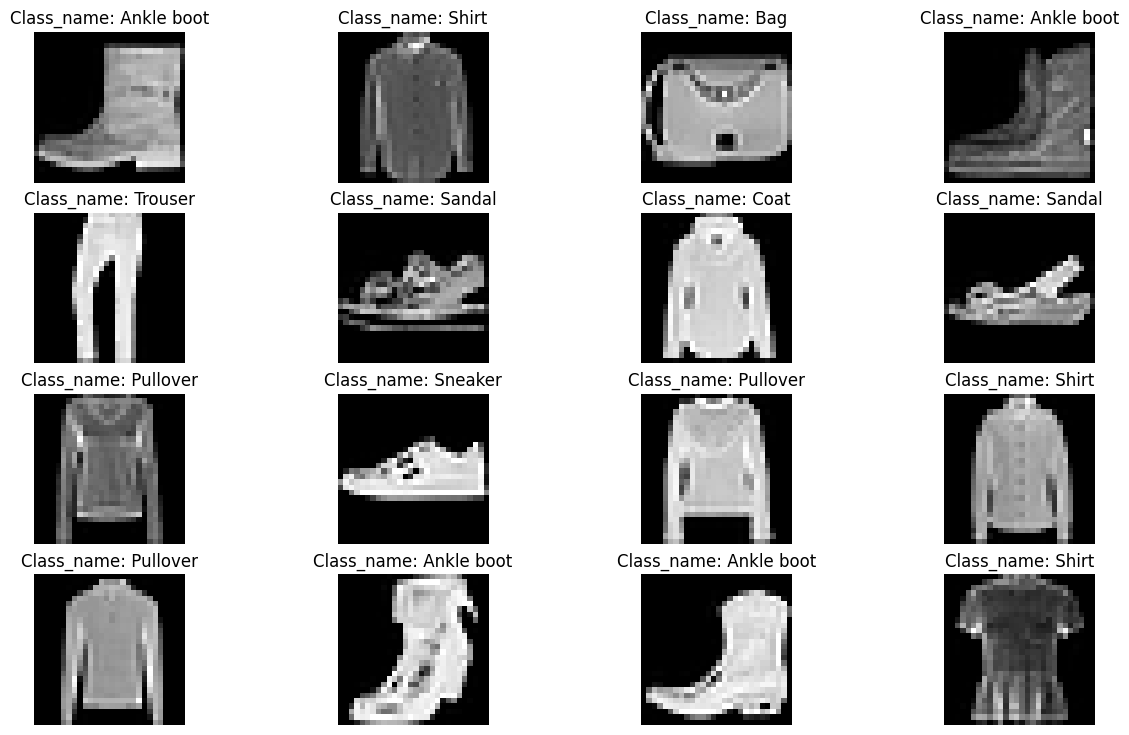

In [7]:
torch.manual_seed(42)

fig = plt.figure(figsize = (15,9))

rows, columns = 4,4

for i in range(1,rows*columns+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()

  image, label = train_data[random_idx]

  fig.add_subplot(rows, columns, i)
  plt.imshow(image.squeeze(),cmap='gray')
  plt.title("Class_name: "+train_data.classes[label])
  plt.axis(False)

## Prepare DataLoaders

In [8]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                               batch_size = BATCH_SIZE,
                               shuffle = True)
test_dataloader = DataLoader(test_data,
                               batch_size = BATCH_SIZE,
                               shuffle = True)

print(f"DataLoaders: {train_dataloader,test_dataloader}")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x79c4e6837b20>, <torch.utils.data.dataloader.DataLoader object at 0x79c4e6834f40>)


### Model Building

In [9]:
train_features_batch = next(iter(train_dataloader))

In [10]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# print(x) // output too massive
# print(output) // output too massive

Shape before flattening: torch.Size([32, 1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([32, 784]) -> [color_channels, height*width]


In [11]:
input_shape = 1
for i in output.shape[1:]:
  input_shape *= i

print(f"Input Shape for network: {input_shape}")

Input Shape for network: 784


In [12]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape : int,output_shape : int, hidden_units : int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )


  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

baseline_model = FashionMNISTModelV1(input_shape = input_shape, output_shape = len(train_data.classes), hidden_units = 8 )
baseline_model

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [13]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = baseline_model.parameters(), lr = 0.1)

In [14]:
def accuracy_fn(y_pred: torch.Tensor, y_true: torch.Tensor):
    correct_predictions = torch.sum(torch.eq(y_pred, y_true)).item()
    total_samples = len(y_true)

    accuracy = correct_predictions / total_samples
    return accuracy


In [15]:
x,y = next(iter(test_dataloader))

y_pred = baseline_model(x)

y_pred.argmax(dim=1),y

(tensor([2, 4, 2, 7, 4, 6, 4, 2, 7, 4, 2, 7, 4, 4, 4, 4, 4, 2, 4, 4, 4, 6, 6, 6,
         6, 6, 7, 6, 7, 2, 6, 2]),
 tensor([9, 6, 8, 8, 2, 3, 4, 9, 8, 9, 5, 3, 4, 7, 2, 7, 2, 5, 0, 6, 1, 1, 0, 0,
         0, 4, 6, 8, 6, 5, 0, 9]))

In [16]:
from tqdm.auto import tqdm

torch.manual_seed(42)

epoch = 3

for i in tqdm(range(1,epoch+1)):

  print(f"Epoch{i}\n----------")

  train_loss = 0
  train_acc = 0

  for batch, (X,y) in enumerate(train_dataloader):

    baseline_model.train()

    y_preds = baseline_model(X)

    loss = loss_fn(y_preds,y)
    train_loss+=loss.item()

    train_acc += accuracy_fn(y_preds.argmax(dim=1),y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if(batch%400 == 0):
      print(f"Looked up {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss/= len(train_dataloader)
  train_acc /= len(train_dataloader)

  test_loss, test_acc = 0,0

  baseline_model.eval()

  with torch.inference_mode():

    for (X,y) in test_dataloader:


      test_preds = baseline_model(X)

      test_loss += loss_fn(test_preds, y)

      test_acc += accuracy_fn(test_preds.argmax(dim=1),y)

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"Train Loss: {train_loss}| Train Accuracy: {train_acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch1
----------
Looked up 0/60000 samples
Looked up 12800/60000 samples
Looked up 25600/60000 samples
Looked up 38400/60000 samples
Looked up 51200/60000 samples
Train Loss: 0.599194281244278| Train Accuracy: 0.7862666666666667 | Test Loss: 0.513557493686676 | Test Accuracy: 0.8185902555910544
Epoch2
----------
Looked up 0/60000 samples
Looked up 12800/60000 samples
Looked up 25600/60000 samples
Looked up 38400/60000 samples
Looked up 51200/60000 samples
Train Loss: 0.4804736030459404| Train Accuracy: 0.8307166666666667 | Test Loss: 0.5283826589584351 | Test Accuracy: 0.8177915335463258
Epoch3
----------
Looked up 0/60000 samples
Looked up 12800/60000 samples
Looked up 25600/60000 samples
Looked up 38400/60000 samples
Looked up 51200/60000 samples
Train Loss: 0.45863975572983423| Train Accuracy: 0.8395166666666667 | Test Loss: 0.5203471183776855 | Test Accuracy: 0.8261781150159745


In [50]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device : torch.device = device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=baseline_model, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.520208477973938,
 'model_acc': 0.8264776357827476}

## Model 1: Build Model with non-linearity

In [38]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape : int, hidden_units : int, output_shape : int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )

  def forward(self, x : torch.Tensor) -> torch.Tensor :
    return self.layer_stack(x)

In [39]:
model_1 = FashionMNISTModelV2(input_shape = input_shape, hidden_units = 8, output_shape = len(train_data.classes))
model_1

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=8, bias=True)
    (4): ReLU()
    (5): Linear(in_features=8, out_features=8, bias=True)
    (6): ReLU()
    (7): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [40]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model_1.parameters(), lr = 0.01 )

#### Making traing and validation function to make life easy

In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [42]:
## training function for model

def train_model(model : torch.nn.Module,
                dataloader : torch.utils.data.DataLoader,
                loss_fn : torch.nn.Module,
                optimizer : torch.optim.Optimizer,
                # accuracy_fn = accuracy_fn,
                accuracy_fn,
                device : torch.device = device ):
  train_acc , train_loss = 0,0
  model.to(device)
  for batch, (X,y) in tqdm(enumerate(dataloader)):

    X = X.to(device)
    y = y.to(device)
    model.train()
    y_preds = model(X)

    loss = loss_fn(y_preds,y)
    acc = accuracy_fn(y_pred=y_preds.argmax(dim = 1), y_true = y)
    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if(batch%400 == 0):
      print(f"Looked up {batch*len(X)}/{len(dataloader.dataset)} samples")

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train Loss: {train_loss} | Train Accuracy: {train_acc}")

## testing function

def test_model(
    model : torch.nn.Module,
    dataloader : torch.utils.data.DataLoader,
    loss : torch.nn.Module ,
    optimizer : torch.optim.Optimizer,
    accuracy_fn,
    device : torch.device = device
  ):
  test_loss , test_acc = 0,0

  model.to(device)
  model.eval()
  with torch.inference_mode():
    for batch, (X,y) in tqdm(enumerate(dataloader)):
      X , y = X.to(device), y.to(device)

      test_preds = model(X)

      test_loss += loss_fn(test_preds, y)
      test_acc += accuracy_fn(y_pred = test_preds.argmax(dim =1),y_true= y)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test Loss: {train_loss} | Test accuarcy: {test_acc}")

In [43]:
torch.manual_seed(42)

epoch = 3

for epoch in tqdm(range(1, epoch+1)):

  print(f"Epoch\n-------------")

  train_model(
      model = model_1,
      accuracy_fn=accuracy_fn,
      dataloader=train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
  )
  test_model(
      model = model_1,
      accuracy_fn=accuracy_fn,
      dataloader=train_dataloader,
      loss = loss_fn,
      optimizer = optimizer,
  )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch
-------------


0it [00:00, ?it/s]

Looked up 0/60000 samples
Looked up 12800/60000 samples
Looked up 25600/60000 samples
Looked up 38400/60000 samples
Looked up 51200/60000 samples
Train Loss: 0.7855246067047119 | Train Accuracy: 0.7106666666666667


0it [00:00, ?it/s]

Test Loss: 0.45863975572983423 | Test accuarcy: 0.7599166666666667
Epoch
-------------


0it [00:00, ?it/s]

Looked up 0/60000 samples
Looked up 12800/60000 samples
Looked up 25600/60000 samples
Looked up 38400/60000 samples
Looked up 51200/60000 samples
Train Loss: 0.6543465256690979 | Train Accuracy: 0.7645


0it [00:00, ?it/s]

Test Loss: 0.45863975572983423 | Test accuarcy: 0.7227166666666667
Epoch
-------------


0it [00:00, ?it/s]

Looked up 0/60000 samples
Looked up 12800/60000 samples
Looked up 25600/60000 samples
Looked up 38400/60000 samples
Looked up 51200/60000 samples
Train Loss: 0.6169964075088501 | Train Accuracy: 0.7822833333333333


0it [00:00, ?it/s]

Test Loss: 0.45863975572983423 | Test accuarcy: 0.7920833333333334


In [51]:
model_1_results = eval_model(model=model_1,
                    data_loader = train_dataloader,
                     loss_fn = loss_fn,
                     accuracy_fn = accuracy_fn)

model_1_results

  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.5851523280143738,
 'model_acc': 0.7920833333333334}

## Model 2: Convolutional Neural Network (`Conv2D` & `MaxPooling2D`)

In [60]:
class FashionMNISTModelV3(nn.Module):
  def __init__(self, input_shape : torch.Tensor, hidden_units : torch.Tensor, output_shape : torch.Tensor):
    super().__init__()


    self.block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels = input_shape,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 'same'
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 'same'
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)

    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 'same'),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 'same'),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )


    self.classifier = nn.Sequential(
        nn.Flatten(),

        nn.Linear(in_features = hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x : torch.Tensor) ->torch.Tensor:
    return self.classifier(
        self.block_2(
            self.block_1(
                x
            )
        )
    )

In [61]:
model_2 = FashionMNISTModelV3(input_shape=1,
                              hidden_units = 10,
                              output_shape=len(train_data.classes))

model_2

FashionMNISTModelV3(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Lets figure out what is happing in `nn.Conv2d`